## Definition of SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 
In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. 
In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

## I. Tuning parameters: Regularization, Kernel, Gamma and Margin

### 1. Regularization

* The Regularization parameter (often termed as C parameter in python’s sklearn library) tells the SVM optimization how much you want to avoid misclassifying each training example.

* For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 
    * The larger C means the smaller the fault tolerance, the less support vectors. It is closer to the concept of hard-margin SVM, but the easier overfitting.

* Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 
    * The smaller the C means the larger the fault tolerance, the more support vectors, and the greater the margin.



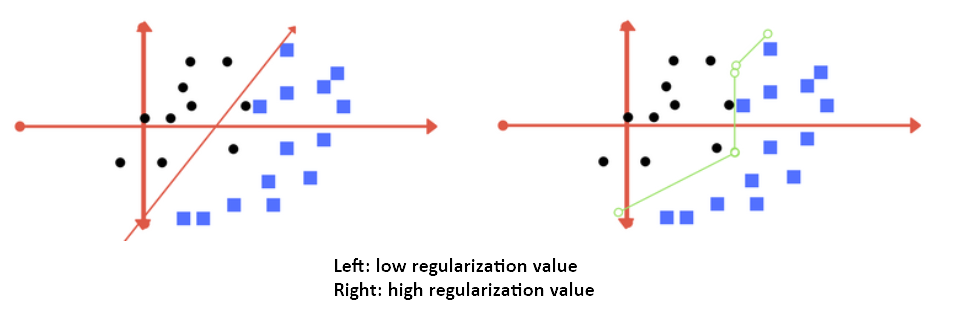

In [26]:
# Low regularization vs. High regularization 
## photo credit to Machine Learning 101
from IPython.display import Image
Image(filename="C:/Users/Yu Chen Su/Documents/GitHub/MachineLearningPlayground/SVM/RegularizationValue.png", width=700, height=700)

### 2. Kernel

The learning of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where the kernel plays role. <br/>
For linear kernel the equation for prediction for a new input using the dot product between the input (x) and each support vector (xi) is calculated as follows:
<br/>
<br/>
f(x) = B(0) + sum(ai * (x,xi))
<br/>
<br/>

This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients B0 and ai (for each input) must be estimated from the training data by the learning algorithm.


### 3. Gamma

The gamma parameter defines how far the influence of a single training example reaches. 
<br/><br/>
With low values meaning ‘far’ and high values meaning ‘close’. 
<br/><br/>
In other words, with low gamma, points far away from plausible seperation line are considered in calculation for the seperation line. Where as high gamma means the points close to plausible line are considered in calculation.

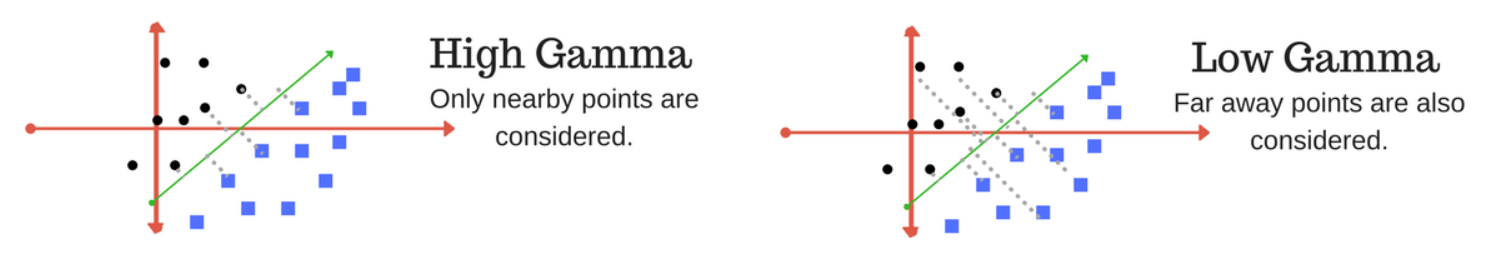

In [27]:
# High Gamma vs. Low Gamma
## photo credit to Machine Learning 101
from IPython.display import Image
Image(filename="C:/Users/Yu Chen Su/Documents/GitHub/MachineLearningPlayground/SVM/Gamma.png", width=800, height=800)

### 4. Margin

Margin is a very importrant characteristic of SVM classifier. SVM to core tries to achieve a good margin.
A margin is a separation of line to the closest class points. <br/>
* A good margin is one where this separation is larger for both the classes.

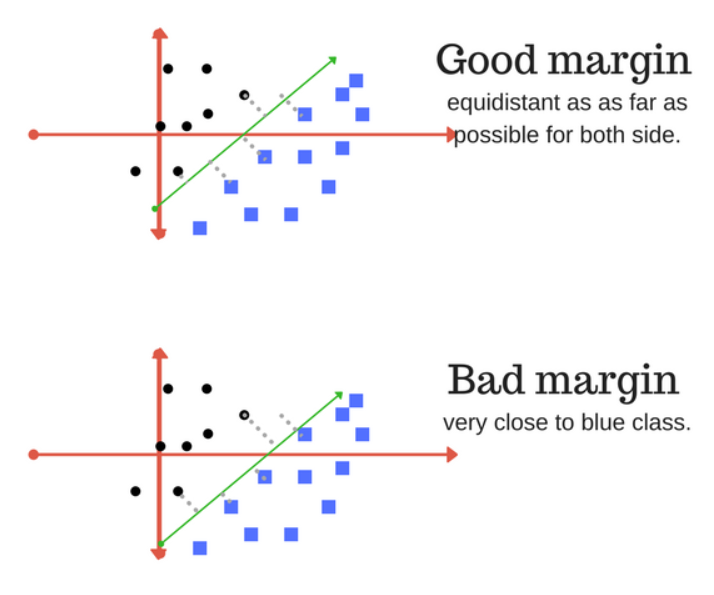

In [28]:
# Good margin vs. Bad margin
## photo credit to Machine Learning 101
from IPython.display import Image
Image(filename="C:/Users/Yu Chen Su/Documents/GitHub/MachineLearningPlayground/SVM/Margin.png", width=400, height=800)

## II. Advantage of using SVM

1. SVM works relatively well when there is clear margin of separation between classes. 
2. SVM is more effective in high dimensional spaces.
3. SVM is effective in cases where number of dimensions is greater than the number of samples.
4. SVM is relatively memory efficient
5. The cut line is perfect, with the biggest margin characteristics
6. It is easy to make non-linear lines (non-linear decision boundaries) by replacing Kernel.

## III. Disadvantage of using SVM

1. SVM algorithm is not suitable for large data sets. 
2. SVM does not perform very well, when the data set has more noise, such as target classes are overlapping.
3. In cases where number of features for each data point exceeds the number of training data sample , the SVM will underperform. 
4. As the support vector classifier works by putting data points, above and below the classifying hyper plane, there is no probabilistic explanation for the classification.
5. The performance is not good because the time complexity is O(n²), when there are more than 10,000 pieces of data, the operation speed will be slower.

## IV. Real-world Application

* Face detection – SVMc classify parts of the image as a face and non-face and create a square boundary around the face.
* Text and hypertext categorization – SVMs allow Text and hypertext categorization for both inductive and transductive models. They use training data to classify documents into different categories. It categorizes on the basis of the score generated and then compares with the threshold value.
* Classification of images – Use of SVMs provides better search accuracy for image classification. It provides better accuracy in comparison to the traditional query-based searching techniques.
* Handwriting recognition – We use SVMs to recognize handwritten characters used widely.


## V. Svm classifier implementation in python with scikit-learn


Support vector machine classifier is one of the most popular machine learning classification algorithm.

Svm classifier mostly used in addressing multi-classification problems. If you are not aware of the multi-classification problem below are examples of multi-classification problems.

* Multi-Classification Problem Examples:
    1. Given fruit features like color, size, taste, weight, shape. Predicting the fruit type.
    2. By analyzing the skin, predicting the different skin disease.
    3. Given Google news articles, predicting the topic of the article. This could be sport, movie, tech news related article, etc.

In short, Multi-classification problem means having more that 2 target classes to predict.

## Reference

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72 <br/>
https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107 <br/>
https://data-flair.training/blogs/applications-of-svm/ <br/>
https://dataaspirant.com/2017/01/25/svm-classifier-implemenation-python-scikit-learn/

### Main Idea

The idea of implementing svm classifier in Python is to use the iris features to train an svm classifier.  <br/> 
Then, use the trained svm model to predict the Iris species type.

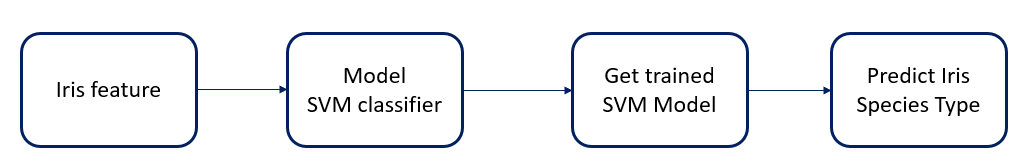

In [29]:
from IPython.display import Image
Image(filename="C:/Users/Yu Chen Su/Documents/GitHub/MachineLearningPlayground/SVM/Process.png", width=1000, height=800)

### Importing Iris dataset from Scikit-Learn

In [30]:
# Required Packages
from sklearn import datasets       # To Get iris dataset
from sklearn import svm            # To fit the svm classifier
import numpy as np
import matplotlib.pyplot as plt            # To visuvalizing the data

In [31]:
# import iris data to model svm classifier
iris_dataset = datasets.load_iris()

In [32]:
# using the DESCR key over the iris_dataset, we can get description of the dataset
print("Iris data set Description :: ", iris_dataset['DESCR'])

Iris data set Description ::  .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [33]:
# Get the iris features and the target classes
print("Iris feature data :: ", iris_dataset['data'])

Iris feature data ::  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2

In [34]:
# These are 4 features first 2 were sepal length, sepal width 
# and the next 2 were petal length and width. 
# Check the target data
# 0 is Setosa; 1 is Versicolorl; 2 is Virginica

print("Iris target :: ", iris_dataset['target'])

Iris target ::  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Modeling Different Kernel Svm classifier using Iris Sepal features


Now let’s model different kernel svm classifier by considering only the Sepal features (Length and Width) and only the Petal features (Lenght and Width)



In [49]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the Sepal two features. (sepal.length & sepal.width)
y = iris.target
C = 25.0  # SVM regularization parameter

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

C:\Users\Yu Chen Su\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yu Chen Su\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Visualizing the modeled svm classifiers with Iris Sepal features

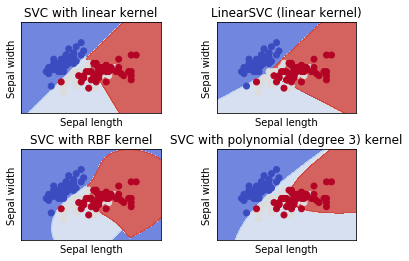

In [50]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
	   'LinearSVC (linear kernel)',
	    'SVC with RBF kernel',
	    'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
	 # Plot the decision boundary. For that, we will assign a color to each
	 # point in the mesh [x_min, x_max]x[y_min, y_max].
    
	 plt.subplot(2, 2, i + 1)
	 plt.subplots_adjust(wspace=0.4, hspace=0.4)

	 Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

	 # Put the result into a color plot
	 Z = Z.reshape(xx.shape)
	 plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

	 # Plot also the training points
	 plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
	 plt.xlabel('Sepal length')
	 plt.ylabel('Sepal width')
	 plt.xlim(xx.min(), xx.max())
	 plt.ylim(yy.min(), yy.max())
	 plt.xticks(())
	 plt.yticks(())
	 plt.title(titles[i])

plt.show()

From the above graphs, you can clearly understand how different kernel modeled with the same svm classifier. <br/>
Now let’s model the svm classifier with Petal features using the same kernel we have used for modeling with Sepal features.

### Modeling Different Kernel Svm classifier using Iris Petal features

In [43]:
iris = datasets.load_iris()
X = iris.data[:, 2:]  # we only take the last two features. (petal.length & petal.width)
y = iris.target
C = 50.0  # SVM regularization parameter

# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)

# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)

C:\Users\Yu Chen Su\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Yu Chen Su\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The above code is similar to the previously modeled svm classifiers code. <br/>
The only difference is loading the Petal features into X variable. <br/>
The remaining code is just the copy past from the previously modeled svm classifier code.

### Visualizing the modeled svm classifiers with Iris Petal features


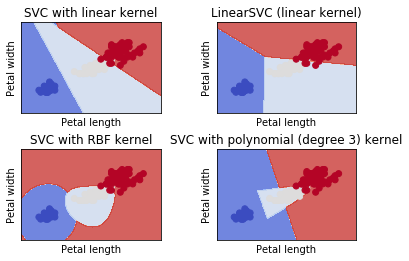

In [44]:
h = .02  # step size in the mesh
# create a mesh to plot in

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
	            np.arange(y_min, y_max, h))
# title for the plots
titles = ['SVC with linear kernel',
	  'LinearSVC (linear kernel)',
	  'SVC with RBF kernel',
	  'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()